# <img style='float: left' src="http://lightning-viz.github.io/images/logo.png"> <br> <br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Circle plots in <a href='http://lightning-viz.github.io/'><font color='#9175f0'>Lightning</font></a>

## <hr> Configuracion

In [1]:
from lightning import Lightning

from numpy import random, asarray

## Conexion al Servidor


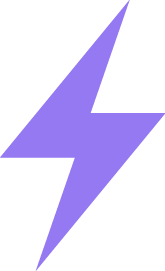

Connected to server at http://localhost:3000


<IPython.core.display.Javascript object>

In [2]:
lgn = Lightning(ipython=True)

## <hr> Solo conexiones

Parcelas circulares muestran las conexiones entre nodos en un gráfico.Vamos a hacer una para un conjunto de conexiones al azar.

In [3]:
connections = random.rand(50,50)
print connections
connections[connections<0.98] = 0
lgn.circle(connections)

[[ 0.72038325  0.07484372  0.93389037 ...,  0.84016144  0.78120621
   0.35306832]
 [ 0.87995434  0.82466729  0.79073925 ...,  0.48870061  0.15359875
   0.45821723]
 [ 0.73035962  0.35919886  0.73109738 ...,  0.92434736  0.71753644
   0.08751741]
 ..., 
 [ 0.93408713  0.36309895  0.17870416 ...,  0.9793039   0.35393678
   0.35793156]
 [ 0.55426005  0.14678003  0.19541344 ...,  0.6368417   0.15149919
   0.66762058]
 [ 0.29247446  0.29543621  0.77783501 ...,  0.61098079  0.63518648
   0.25506489]]


/home/romario/envGp/local/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


Podemos añadir una etiqueta de texto a cada nodo . Aquí sólo tendremos que añadir un identificador numérico.
Al hacer clic en una etiqueta de nodo destaca sus conexiones

In [4]:
connections = random.rand(50,50)
connections[connections<0.98] = 0
print connections
lgn.circle(connections, labels=['node ' + str(x) for x in range(50)])

[[ 0.          0.          0.         ...,  0.          0.          0.99551548]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          0.99010116]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]


## <hr> Añadiendo grupos

Las parcelas son útiles para visualizar las relaciones jerárquicas .
Se pueden especificar varios niveles de agrupamiento.

In [5]:
connections = random.rand(50,50)
connections[connections<0.98] = 0
print connections

group = (random.rand(50) * 3).astype('int')
lgn.circle(connections, labels=['group ' + str(x) for x in group], group=group)

[[ 0.         0.         0.        ...,  0.         0.         0.       ]
 [ 0.         0.         0.        ...,  0.         0.         0.       ]
 [ 0.         0.         0.9963432 ...,  0.         0.         0.       ]
 ..., 
 [ 0.         0.         0.        ...,  0.         0.         0.       ]
 [ 0.         0.         0.        ...,  0.         0.         0.       ]
 [ 0.         0.         0.        ...,  0.         0.         0.       ]]


## <hr> Grupos anidados

Y ahora trate de añadir un segundo nivel .Etiquetaremos el segundo grupo para dejar en claro lo que está pasando.
Si hace clic en cualquiera de los arcos exteriores , se pondrán de relieve las conexiones de ese grupo

In [6]:
connections = random.rand(50,50)
connections[connections<0.98] = 0

group1 = (random.rand(50) * 3).astype('int')
group2 = (random.rand(50) * 4).astype('int')
lgn.circle(connections, labels=['group ' + str(x) for x in group2], group=[group1, group2])

In [7]:
connections = [[0, 1], [0, 2], [3, 5], [2, 4], [1, 2], [3, 4], [1, 5], [1, 6], [2, 7], [2, 8], [3, 8], [8, 7]]
print connections
lgn.circle(connections, labels=['node ' + str(x) for x in range(50)])

[[0, 1], [0, 2], [3, 5], [2, 4], [1, 2], [3, 4], [1, 5], [1, 6], [2, 7], [2, 8], [3, 8], [8, 7]]


## Ejemplo Circle con datos extraidos de una base de datos

In [8]:
import psycopg2, psycopg2.extras
try:
    conn = psycopg2.connect("dbname='gp' user='roma' host='localhost' password='roma'")
except:
    print "I am unable to connect to the database"
cur = conn.cursor()

In [9]:
cur.execute("""SELECT subtipos.idsubtipo,empresas.idempresa,nomempresa,nomsubtipo from produccion inner join empresas on produccion.idempresa=empresas.idempresa inner join subtipos on produccion.idsubtipo=subtipos.idsubtipo where anio=2004 and subtipos.idsubtipo=1""")
rows = cur.fetchall()
i=1
x=[]
y=[]
x.append("Tipo de Energia")
x.append("Energia Hidraulica")
y.append([35,1])
for row in rows:
    x.append(str(row[2]))
    i=i+1
    y.append([int(row[0]),int(row[1])])
print x
print y

['Tipo de Energia', 'Energia Hidraulica', 'CELEC-Electroguayas', 'CELEC-Hidroagoy\xc3\xa1n', 'CELEC-Hidropaute', 'CELEC-Termoesmeraldas', 'CELEC-Termopichincha', 'CNEL-Bol\xc3\xadvar', 'CNEL-El Oro', 'CNEL-Esmeraldas', 'CNEL-Los R\xc3\xados', 'CNEL-Milagro', 'CNEL-Sta. Elena', 'CNEL-Sto. Domingo', 'CNEL-Sucumb\xc3\xados', 'E.E. Ambato', 'E.E. Centro Sur', 'E.E. Cotopaxi', 'E.E. Gal\xc3\xa1pagos', 'E.E. Norte', 'E.E. Quito', 'E.E. Riobamba', 'E.E. Sur', 'Ecoluz', 'Ecuapower', 'Elecaustro', 'El\xc3\xa9ctrica de Guayaquil', 'Electroandina', 'Electroquil', 'Ecoelectric', 'Sipec', 'Hidronaci\xc3\xb3n', 'Intervisa Trade', 'Agip', 'Repsol', 'Petroamazonas']
[[35, 1], [1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [1, 9], [1, 10], [1, 11], [1, 12], [1, 13], [1, 14], [1, 15], [1, 16], [1, 17], [1, 18], [1, 19], [1, 20], [1, 21], [1, 22], [1, 23], [1, 24], [1, 25], [1, 26], [1, 27], [1, 28], [1, 29], [1, 30], [1, 31], [1, 32], [1, 33], [1, 34]]


## Relacion entre las empresas y el tipo de Energia Hidraulica

<br>
En esta grafica podemos observar el tipo de Energia Hidraulica se relaciona con todas las empresas , ya que cada una de las empresas producen energia a traves de procesos hidraulicos , el cambio de color por grupos es para diferenciar y comprender como se relacionan los nodos para que se produzca el cambio de color en agrupamiento , los nodos que tengan el mismo valor tendran el mismo color 

In [10]:
group=[[0, 0, 1, 1, 1, 1, 2, 2, 2 , 3 , 3 , 3 , 3 , 4 , 4 , 4 , 4 , 5 , 5 , 5 , 6 , 6 , 6 , 6 , 6 , 6 , 7 , 7 , 7 , 8 , 8 , 8 , 8 , 9 , 9 , 9 , 9 ]]
lgn.circle(y, labels=x,group=group)